In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Objective Function

In [2]:
f = lambda x: (x-5)**2 + 20*np.sin(5*x)

In [397]:
x = np.arange(-5,15,0.01)
y = list(map(f,x))

In [398]:
plt.style.use('seaborn')

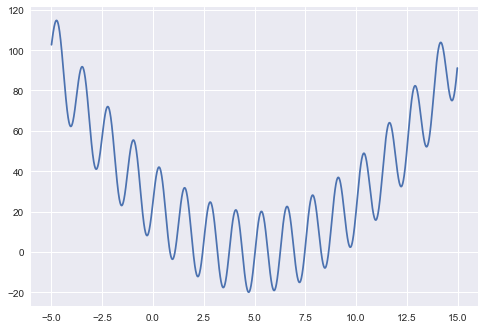

In [399]:
plt.plot(x,y)
plt.show()

### Exact Solver

In [6]:
x_list = np.arange(3.0,6.0,0.01)
y_list = list(map(f,x_list))

In [7]:
x_best = x_list[np.argmin(y_list)]

In [8]:
x_best

4.7099999999999635

### Simulated Annealing

In [370]:
#limit search range to (-15,15)

def generate_neighbor(x,scale):
    x = x + scale*(np.random.rand() - 0.5)
    if (x < -15) :
        return x + scale*(np.random.rand())/2
    elif (x>15):
        return x - scale*(np.random.rand())/2
    else:
        return x

In [371]:
def accept_prob(x, new_x, t):
    deltaE = abs(f(new_x) - f(x))
    Prob = np.exp(-deltaE/t)
    return Prob

In [372]:
def annealing(T_max, reduction_frac):
    x = 0
    cost = []
    solution = []
    t = T_max
    obj = 0
    scale = np.sqrt(T_max)
    while t > 0.00001:
        new_x = generate_neighbor(x,scale)
        if f(new_x) <= f(x):
            x = new_x
        else:
            prob = accept_prob(x, new_x, t)
            r = np.random.rand()
            if r < prob:
                x = new_x
        obj = f(x)
        cost.append(f(x))
        solution.append(x)
        t = t*reduction_frac
    return cost, solution, x, obj 

In [377]:
#initialization
T_max = 1000
reduction_frac = 0.99

In [418]:
cost, solution, x, obj = annealing(T_max, reduction_frac)
print('optimizer: x = ',x)
print('minimum objective value: ', obj)

optimizer: x =  4.7095999259814425
minimum objective value:  -19.913723122409426


Text(0.5,1,'Costs')

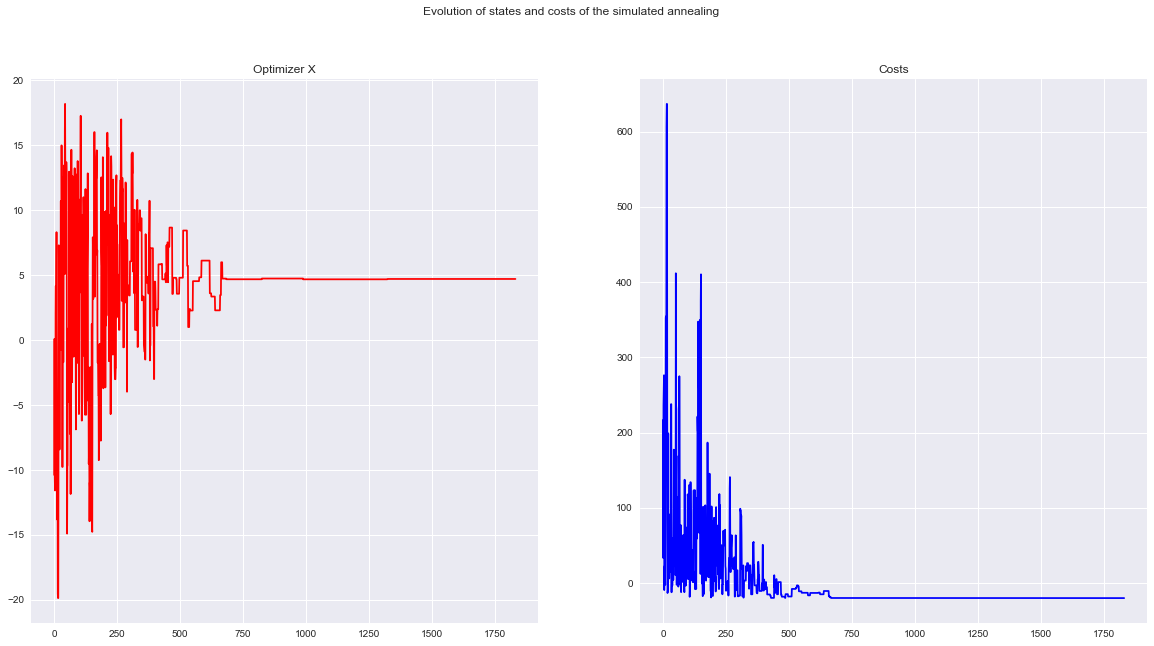

In [419]:
plt.figure(figsize = (20,10))
plt.suptitle("Evolution of states and costs of the simulated annealing")
plt.subplot(121)
plt.plot(solution, 'r')
plt.title("Optimizer X")
plt.subplot(122)
plt.plot(cost, 'b')
plt.title("Costs")

### Since SA is not deterministic, the visualization below displays the distribution of the optimizer x 

In [387]:
from collections import defaultdict
res = []
for n in range(0,1000):
    cost, solution, x, obj = annealing(T_max, reduction_frac)
    res.append(round(x,2))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


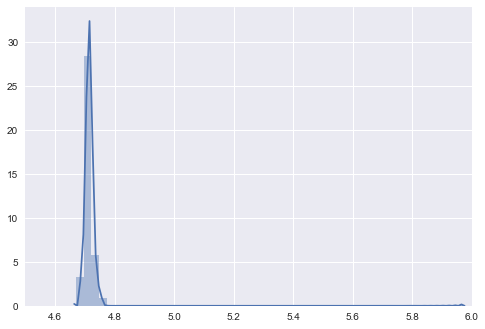

In [392]:
sns.distplot(res)
plt.xlim(4.5,6)
plt.show()

### Create Simulated Annealing Animation

In [421]:
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib import rc
from IPython.display import HTML

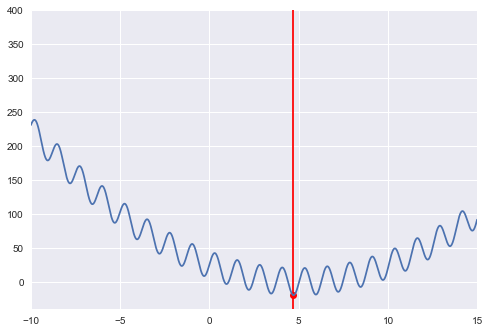

In [422]:
fig, ax = plt.subplots()
dot, = plt.plot([0], [0], 'ro')
line, = plt.plot( [0, 0], [-100,400], 'r')

x = np.arange(-10,15,0.01)
y = list(map(f,x))
l = plt.plot(x,y)

ax = plt.axis([-10,15,-40,400])

def update(frame):
    x = solution[frame]
    y = cost[frame]
    dot.set_data(x, y)
    line.set_data( [x, x], [-100, 400])
    return line, dot

ani = FuncAnimation(fig, update, frames=np.arange(0, len(cost), 1),interval=10, blit = True, repeat=True)
ani.save('test.gif', writer = PillowWriter(fps=50))

In [406]:
from IPython.display import HTML
HTML('<img src="test.gif">')